# **Naive Bayes**

In [1]:
import pandas as pd
data = 'Step_datasets_14.csv'

df = pd.read_csv(data)

In [2]:
X = df.drop(['ENTITY'], axis=1)

y = df['ENTITY']

In [3]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [5]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [6]:
# import category encoders

import category_encoders as ce

In [11]:
X_train.drop(['REFERENCES'], axis=1, inplace=True)


AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [12]:
X_test.drop(['REFERENCES'], axis=1, inplace=True)

In [13]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


In [14]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [15]:
y_pred = gnb.predict(X_test)

y_pred

array(['EDGE_LOOP', 'FACE_OUTER_BOUND', 'EDGE_LOOP', 'EDGE_LOOP',
       'EDGE_LOOP', 'EDGE_LOOP', 'EDGE_LOOP', 'EDGE_LOOP', 'LINE',
       'EDGE_LOOP', 'EDGE_LOOP', 'EDGE_LOOP', 'EDGE_LOOP', 'EDGE_LOOP',
       'LINE', 'AXIS2_PLACEMENT_3D', 'LINE', 'EDGE_LOOP', 'LINE',
       'EDGE_LOOP', 'LINE', 'FACE_OUTER_BOUND', 'LINE', 'LINE',
       'EDGE_LOOP', 'FACE_OUTER_BOUND', 'EDGE_LOOP', 'EDGE_LOOP',
       'EDGE_LOOP', 'EDGE_LOOP', 'LINE', 'LINE', 'FACE_OUTER_BOUND',
       'EDGE_LOOP', 'FACE_OUTER_BOUND', 'EDGE_LOOP', 'FACE_OUTER_BOUND',
       'EDGE_LOOP', 'EDGE_LOOP', 'LINE', 'EDGE_LOOP', 'EDGE_LOOP',
       'EDGE_LOOP', 'LINE', 'EDGE_LOOP', 'EDGE_LOOP', 'EDGE_LOOP', 'LINE',
       'EDGE_LOOP', 'EDGE_LOOP', 'EDGE_LOOP', 'EDGE_LOOP', 'EDGE_LOOP',
       'EDGE_LOOP', 'EDGE_LOOP', 'FACE_OUTER_BOUND', 'EDGE_LOOP',
       'EDGE_LOOP', 'LINE', 'EDGE_LOOP', 'EDGE_LOOP', 'LINE',
       'AXIS2_PLACEMENT_3D', 'LINE', 'EDGE_LOOP', 'LINE', 'LINE',
       'EDGE_LOOP', 'EDGE_LOOP', 'EDGE_LOOP', 'FA

In [16]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.0870


In [17]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array(['ORIENTED_EDGE', 'EDGE_CURVE', 'VECTOR', ..., 'LINE', 'PLANE',
       'DIRECTION'], dtype='<U44')

In [18]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))


Training-set accuracy score: 0.9289


In [19]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.9289
Test set score: 0.0870


In [20]:
# check null accuracy score

null_accuracy = (7407/(7407+2362))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7582


In [21]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

True Positives(TP) =  0

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  0


In [22]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

ValueError: Shape of passed values is (34, 34), indices imply (2, 2)

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                                                    precision    recall  f1-score   support

                                     ADVANCED_FACE       0.00      0.00      0.00        18
                               APPLICATION_CONTEXT       0.00      0.00      0.00         1
                   APPLICATION_PROTOCOL_DEFINITION       0.00      0.00      0.00         1
                                          APPROVAL       0.00      0.00      0.00         1
                                     APPROVAL_ROLE       0.00      0.00      0.00         1
                                   APPROVAL_STATUS       0.00      0.00      0.00         2
                                AXIS2_PLACEMENT_3D       0.00      0.00      0.00        32
                         B_SPLINE_CURVE_WITH_KNOTS       0.00      0.00      0.00         1
                                     CALENDAR_DATE       0.00      0.00      0.00         1
                                   CARTESIAN_POINT       0.00      0.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [24]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [25]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : nan


<ipython-input-25-56c129a01939>:3: RuntimeWarning: invalid value encountered in divide
  classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)


In [26]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : nan


<ipython-input-26-fd030162d487>:3: RuntimeWarning: invalid value encountered in divide
  classification_error = (FP + FN) / float(TP + TN + FP + FN)


In [27]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : nan


<ipython-input-27-14528085cc28>:3: RuntimeWarning: invalid value encountered in divide
  precision = TP / float(TP + FP)


In [28]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : nan


<ipython-input-28-4541e477f8ab>:1: RuntimeWarning: invalid value encountered in divide
  recall = TP / float(TP + FN)


In [29]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : nan


<ipython-input-29-d9fdb34c59d3>:1: RuntimeWarning: invalid value encountered in scalar divide
  specificity = TN / (TN + FP)


In [30]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
    

In [31]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_df

ValueError: Shape of passed values is (10, 47), indices imply (10, 2)

In [32]:
# print the first 10 predicted probabilities for class 1 - Probability of >50K

gnb.predict_proba(X_test)[0:10, 1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [33]:
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = gnb.predict_proba(X_test)[:, 1]

In [35]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

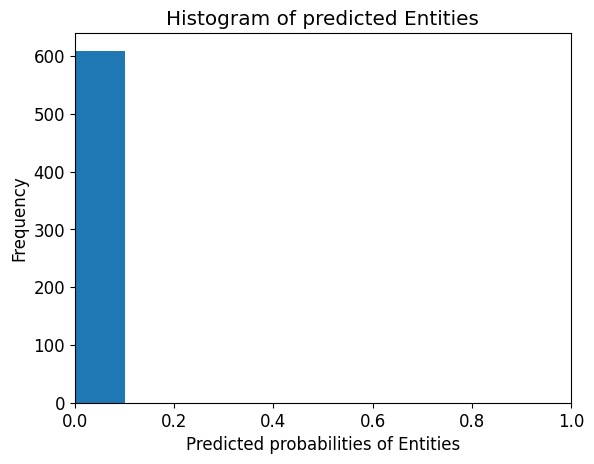

In [37]:
# plot histogram of predicted probabilities


# adjust the font size
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted Entities')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Entities')
plt.ylabel('Frequency')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


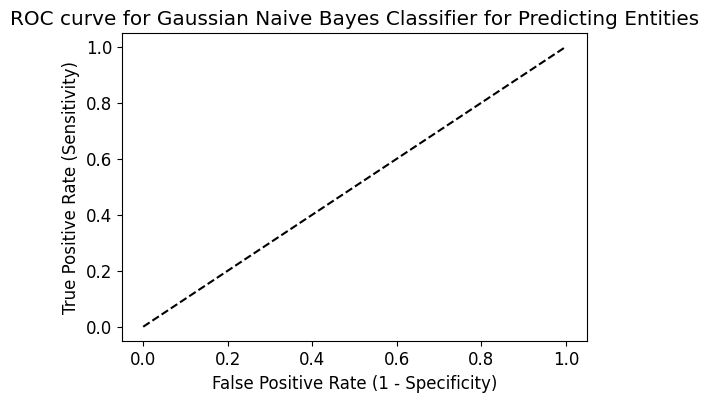

In [39]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = '>50K')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Entities')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [40]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ValueError: multi_class must be in ('ovo', 'ovr')